In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns

In [9]:

iris_df = pd.read_csv("IRIS.csv", )

In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# normalize the iris_df first four columns using min-max normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

iris_df_norm = scaler.fit_transform(iris_df.iloc[:, :4])    



In [13]:
iris_df_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

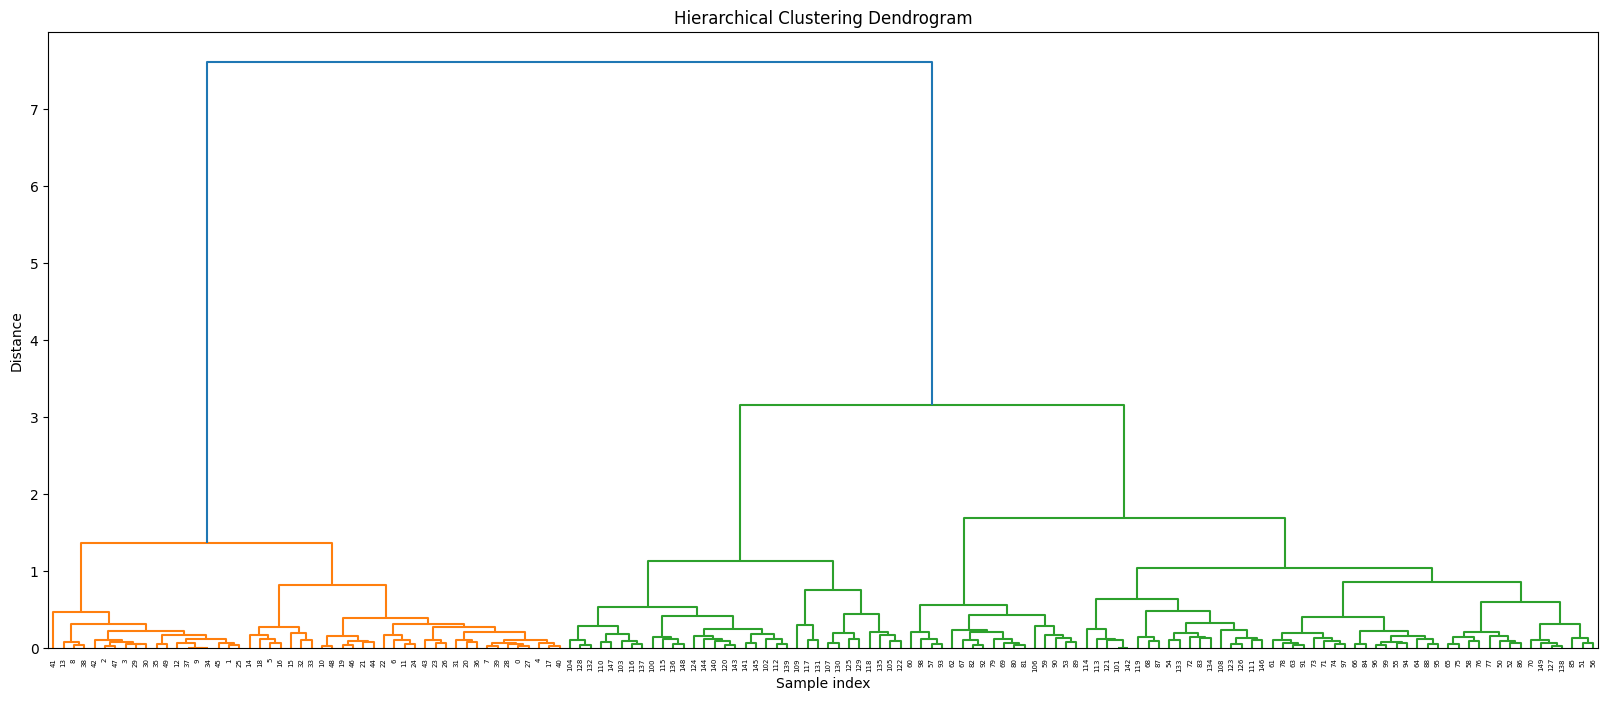

In [14]:
# generate the linkage matrix
Z = linkage(iris_df_norm, 'ward')

fig, ax = plt.subplots(figsize=(20, 8))
# plot the dendrogram
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')

_ = dendrogram(Z, no_labels=False, ax=ax)

In [24]:
# Perform hierarchical clustering
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(iris_df_norm)
labels = clustering.labels_

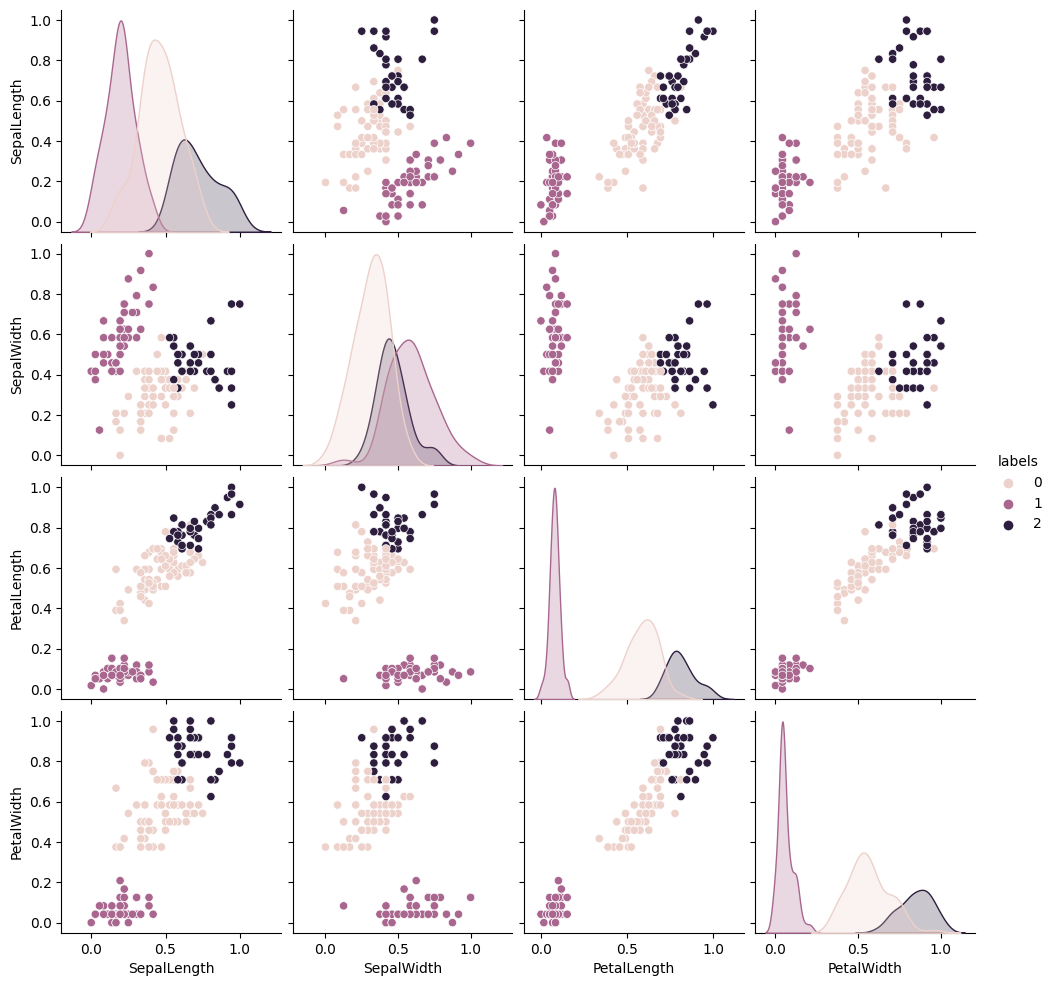

In [28]:

#fig, ax = plt.subplots()

#scatter = ax.scatter(iris_df_norm[:, 0], iris_df_norm[:, 1], c=labels, cmap='rainbow')
iris_df_norm = pd.DataFrame(iris_df_norm, columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])
#ax.set_title('Clusters')
iris_df_norm["labels"] = labels
sns.pairplot(iris_df_norm, hue='labels')

Text(0.5, 1.0, 'Agglomerative Clustering with 5 clusters')

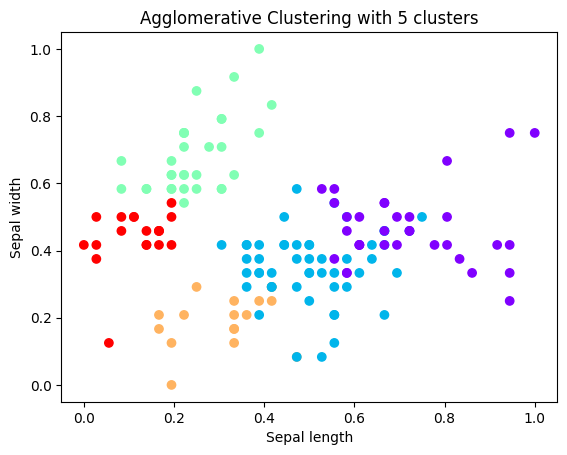

In [22]:

# Perform hierarchical clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(iris_df_norm)
labels = clustering.labels_

# Plot the clustering
fig, ax = plt.subplots()

ax.scatter(iris_df_norm[:, 0], iris_df_norm[:, 1], c=labels, cmap='rainbow')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Agglomerative Clustering with {} clusters'.format(n_clusters))


/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Se observa que el k adecuado es 3


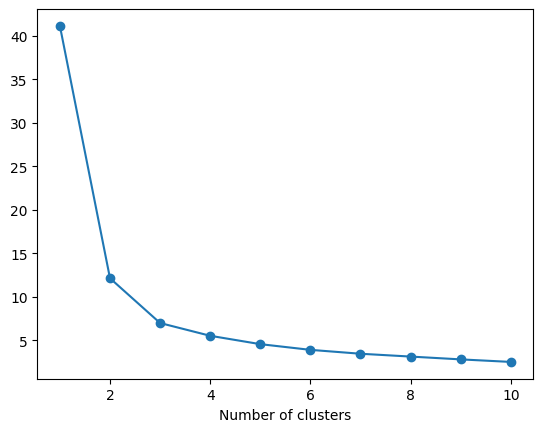

In [23]:
# Establecinedo el K


from sklearn.cluster import KMeans


distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(iris_df_norm)
    distortions.append(km.inertia_)
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')

print("Se observa que el k adecuado es 3")

/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipecabello/git/awake/.venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Text(0.5, 0, 'Number of clusters')

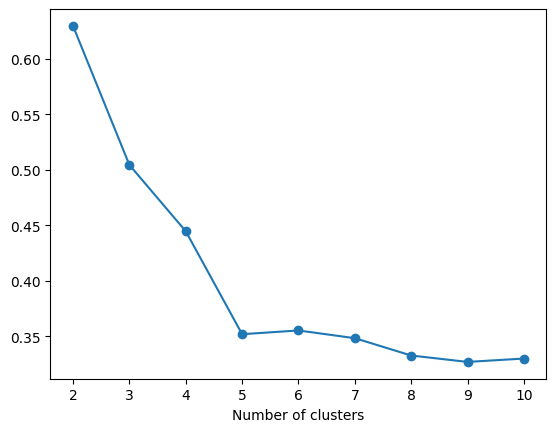

In [26]:
# Se puede usar tambien el indice de la silueta

from sklearn.metrics import silhouette_score


silhouette_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(iris_df_norm)
    silhouette_scores.append(silhouette_score(iris_df_norm, km.labels_))

# plot
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')


*Dendrogramas*: Un dendrograma es una representación visual en forma de árbol que muestra la agrupación jerárquica de entidades, como observaciones o variables. Se utiliza a menudo en técnicas de agrupación jerárquica. Cada nivel del árbol representa una agrupación particular, y la altura de la división entre dos entidades en el árbol representa la distancia (o disimilitud) entre esas dos entidades. Cuanto más alto es el nivel de la división, más diferentes son las entidades.

*Cluster*: En el contexto de la ciencia de datos, un cluster se refiere a un grupo de datos que son similares entre sí de alguna manera. Los algoritmos de clustering buscan agrupar los datos en clusters de tal manera que los datos en el mismo cluster sean más similares entre sí que los datos en diferentes clusters. Los clusters son útiles para explorar y entender la estructura de los datos, y pueden ser utilizados para la segmentación de clientes, la detección de anomalías, y otras aplicaciones.

*Agrupación* *jerárquica*: La agrupación jerárquica es una técnica de clustering que busca construir una jerarquía de clusters. Comienza con cada observación en su propio cluster, y luego fusiona los clusters más cercanos juntos de manera iterativa, hasta que todas las observaciones están en un solo cluster. La jerarquía de clusters resultante puede ser visualizada con un dendrograma. La agrupación jerárquica puede ser útil cuando se desea explorar diferentes niveles de agrupación, y no se requiere especificar el número de clusters de antemano.